In [1]:
import graphlab


##import some house price details


In [96]:
sales=graphlab.SFrame('home_data.gl/')
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


In [95]:
sales
graphlab.canvas.set_target('ipynb')
sales.show(view="Scatter Plot",x="sqft_living",y="price")

# create a simple regression model square feet vs price and split the data in to training and test data that is 80 % below are using for training data and remaining 20% will be used for test data.

In [11]:
train_data,test_data=sales.random_split(.8,seed=0)

# Build the regression model


In [14]:
squt_model=graphlab.linear_regression.create(train_data,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16559

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 1.027824     | 4337471.886321     | 1890697.894618       | 263175.752870 | 258290.259554   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

# Evaluate the simple model


In [15]:
print test_data

+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 0114101516 | 2014-05-28 00:00:00+00:00 | 310000 |    3     |     1     |     1430    |
| 9297300055 | 2015-01-24 00:00:00+00:00 | 650000 |    4     |     3     |     2950    |
| 1202000200 | 2014-11-03 00:00:00+00:00 | 233000 |    3     |     2     |     1710    |
| 8562750320 | 2014-11-10 00:00:00+00:00 | 580500 |    3     |    2.5    |     2320    |
| 7589200193 | 2014-11-10 00:00:00+00:00 | 535000 |    3     |     1     |     1090    |
| 2078500320 | 2014-06-20 00:00:00+00:00 | 605000 |    4     |    2.5    |     2620    |
| 7766200013 | 2014-08-11 00:00:00+00:00 | 775000 |    4     |    2.25   |     4220    |
| 9478500640 | 2014-08-19 00:00:00+00:00 | 292500 |    4     |    2.5    |     2250    |
| 9558200045 | 2014-0

In [17]:
print test_data['price'].mean()

543054.042563


In [18]:
print squt_model.evaluate(test_data)

{'max_error': 4134096.967998088, 'rmse': 255219.44618507352}


# lets show how our prediction looks like


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline


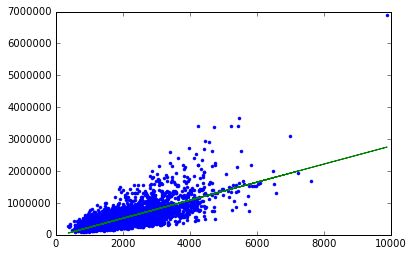

In [22]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',test_data['sqft_living'],squt_model.predict(test_data),'-')

In [24]:
squt_model.get('coefficients')

name,index,value,stderr
(intercept),None,-49546.9947521,5044.68572631
sqft_living,None,283.159760036,2.21513308173


p# Explore other features

In [53]:
myfeatures=('bedrooms','bathrooms','sqft_living','floors','zipcode')

In [29]:
sales[features].show()

In [33]:
sales.show[view='Boxwhisker Plot',x='zipcode',y='price']

SyntaxError: invalid syntax (<ipython-input-33-3a1ed0f006de>, line 1)

In [34]:
print features

['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'zipcode']


In [36]:
print squt_model.evaluate(test_data)
print features_model.evaluate(test_data)

{'max_error': 4134096.967998088, 'rmse': 255219.44618507352}


NameError: name 'features_model' is not defined

sales.show(view='BoxWhisker Plot',x='zipcode',y='price')

In [40]:
# Build a regression


In [46]:
features_model=graphlab.linear_regression.create(train_data,target='price',features=myfeatures)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16503

Number of features          : 5

Number of unpacked features : 5

Number of coefficients    : 114

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.057146     | 3726435.688897     | 2596401.208589       | 182464.649485 | 187043.344746   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [47]:
print myfeatures


['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'zipcode']


In [55]:
print squt_model.evaluate(test_data)
print features_model.evaluate(test_data)

{'max_error': 4134096.967998088, 'rmse': 255219.44618507352}
{'max_error': 3467352.9785830225, 'rmse': 179872.48065964933}


# Apply learned models to predict 3 houses

In [56]:
house1=sales[sales['id']=='5309101200']

In [57]:
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="house-img.jpeg">

In [78]:
print house1['price']

[620000L, ... ]


In [79]:
print squt_model.predict(house1)

[630036.4293338079]


In [81]:
print features_model.predict(house1)

[720385.8498682707]


# prediction for a second fancy house

In [88]:
house2=sales[sales['id']=='1925069082']

house2


In [91]:
print squt_model.predict(house2)

[1264314.2918139887]


In [92]:
print features_model.predict(house2)

[1444183.8020704514]


# last set super fancy

# Assignment 

In [111]:
high = sales[sales['zipcode'=='98103']]


In [113]:
high['price'].mean()

540088.1419053345

In [102]:
sales['zipcode'].show()

In [103]:
inRange = sales[(sales['sqft_living']>=2000) & (sales['sqft_living']<=4000)]

In [105]:
inRange.num_rows()

9221

In [106]:
sales.num_rows() 

21613

In [107]:
advanced_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode','condition', 'grade','waterfront','view','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15'] 

In [108]:
adv_features_model = graphlab.linear_regression.create(train_data,target='price',features=advanced_features,validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 127

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.121323     | 3469012.450686     | 154580.940736 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [109]:
adv_features_model.evaluate(test_data)

{'max_error': 3556849.413858208, 'rmse': 156831.1168021901}

In [110]:
features_model.evaluate(test_data)

{'max_error': 3467352.9785830225, 'rmse': 179872.48065964933}

In [116]:
high = sales[sales['zipcode'=='98039']]


In [115]:
high['price'].mean()

540088.1419053345

In [117]:
high = sales[sales['zipcode'=='98039']]

high['price'].mean()



540088.1419053345

In [125]:
zip1 = sales[sales['zipcode']=='98039']



In [126]:
zip1['price'].mean()

2160606.5999999996